In [ ]:
## 3.1 - Basic Object Detection using OpenCV and Haar Cascades

--2025-08-31 08:26:32--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91814 (90K) [image/jpeg]
Saving to: ‘kid.jpg’

kid.jpg             100%[===================>]  89.66K  --.-KB/s    in 0.003s  

2025-08-31 08:26:32 (30.1 MB/s) - ‘kid.jpg’ saved [91814/91814]



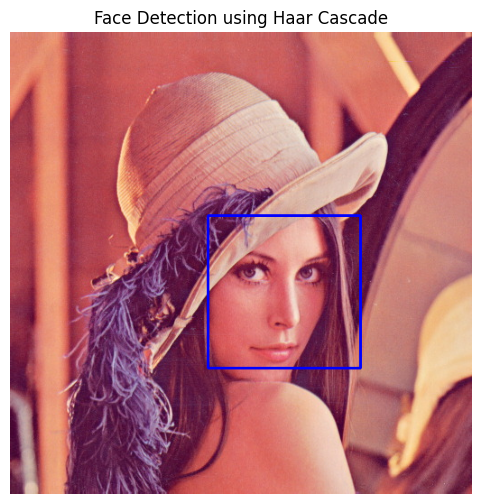

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load Haar Cascade Classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# --------------------------
# Download a working sample kid image
# --------------------------
!wget -O kid.jpg https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg
img_path = "kid.jpg"

# Load the image
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Convert to RGB for matplotlib display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display image
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Face Detection using Haar Cascade")
plt.show()

In [3]:
## 3.2 - Basic Object Detection using YOLOv8

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

0: 384x640 2 persons, 1 tie, 317.3ms
Speed: 4.8ms preprocess, 317.3ms inference, 39.6ms postprocess per image at shape (1, 3, 384, 640)


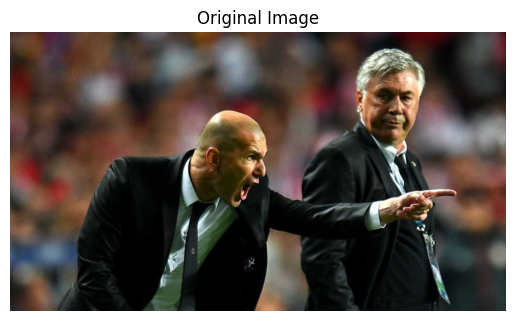

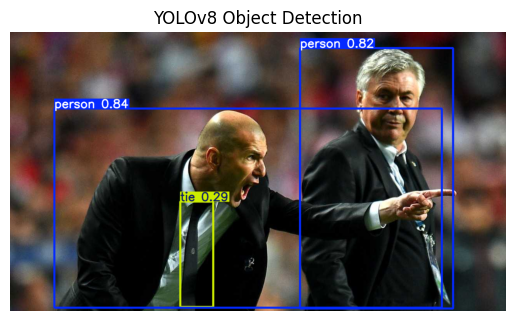

In [4]:
!pip install ultralytics

import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import requests
import numpy as np

# Load YOLOv8 nano model
model = YOLO("yolov8n.pt")

# Download the Zidane image
image_url = "https://ultralytics.com/images/zidane.jpg"
arr = np.asarray(bytearray(requests.get(image_url).content), dtype=np.uint8)
img_cv = cv2.imdecode(arr, cv2.IMREAD_COLOR)

# Run YOLOv8 on the image (pass numpy array directly)
results = model(img_cv)

# Plot the original image
img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Original Image")
plt.show()

# Show detection results
result_img = results[0].plot()  # draws boxes, labels, and confidence scores
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("YOLOv8 Object Detection")
plt.show()